## Assignment - Multi Linear Regression -  50 startup data

To prepare a prediction model for profit of 50_startups data.

Do transformations for getting better predictions of profit and
make a table containing R^2 value for each prepared model

In [3]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sn
from statsmodels.graphics.regressionplots import influence_plot
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import r2_score
from sklearn.preprocessing import quantile_transform

In [4]:
data=pd.read_csv("C:/Users/HP/Downloads/multilinear regression/data set/50_Startups.csv")

In [5]:
data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [6]:
data.head(10)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [7]:
cdata=data.copy()

In [8]:
cdata

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [9]:
logdata=data.copy()

In [10]:
logdata

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [11]:
data.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [12]:
data.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


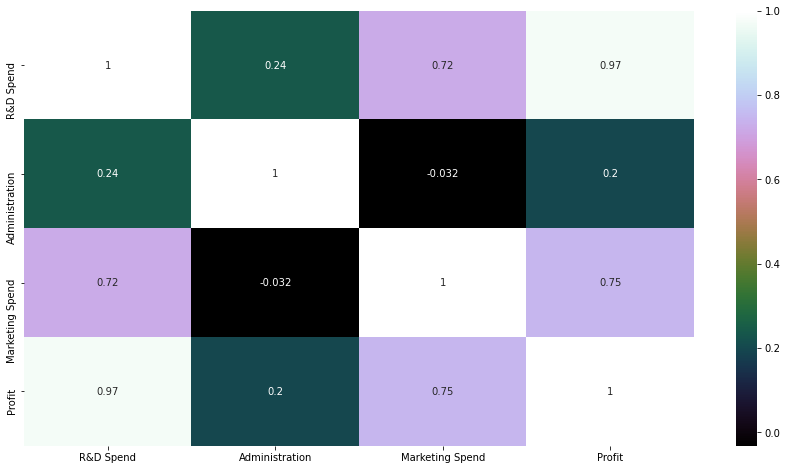

In [13]:
plt.figure(figsize=(15,8))
sns.heatmap(data=data.corr(), annot=True, cmap='cubehelix')

<Figure size 1008x576 with 0 Axes>

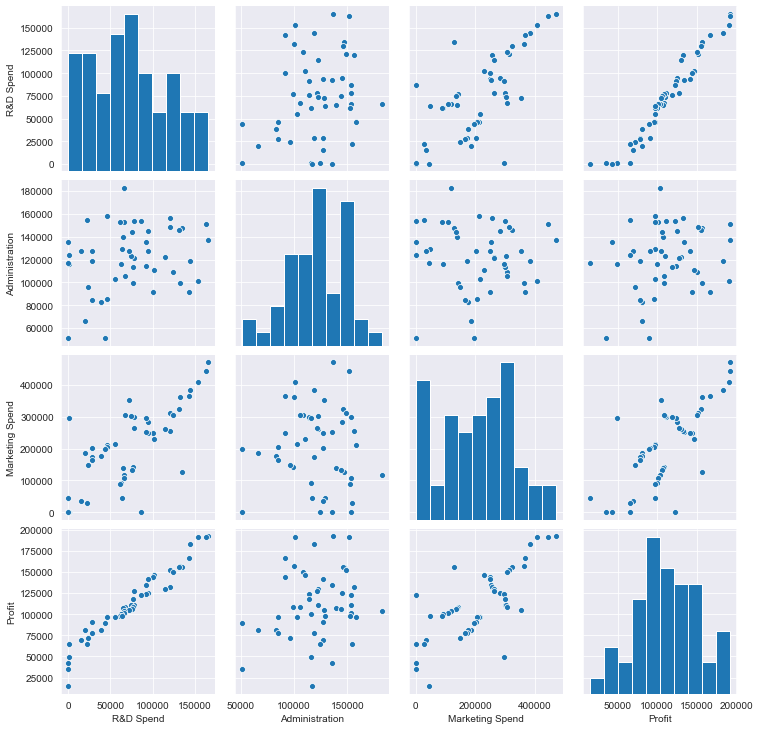

In [14]:
plt.figure(figsize=(14,8))
sns.set_style(style='darkgrid')
sns.pairplot(data)

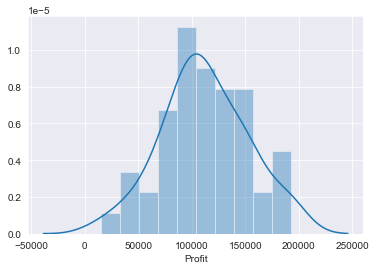

In [16]:
sns.distplot(data.Profit, bins = 10) 

In [17]:
cdata.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [18]:
state=pd.get_dummies(data['State'],drop_first=True)
state.head()

,Florida,New York
0,0,1
1,0,0
2,1,0
3,0,1
4,1,0


In [19]:
cdata=pd.concat([cdata,state],axis=1)
cdata.head()

,R&D Spend,Administration,Marketing Spend,State,Profit,Florida,New York
0,165349.20,136897.80,471784.10,New York,192261.83,0,1
1,162597.70,151377.59,443898.53,California,191792.06,0,0
2,153441.51,101145.55,407934.54,Florida,191050.39,1,0
3,144372.41,118671.85,383199.62,New York,182901.99,0,1
4,142107.34,91391.77,366168.42,Florida,166187.94,1,0


In [20]:
cdata.drop(['State'],axis=1,inplace=True)

In [21]:
cdata.head(2)

,R&D Spend,Administration,Marketing Spend,Profit,Florida,New York
0,165349.2,136897.80,471784.10,192261.83,0,1
1,162597.7,151377.59,443898.53,191792.06,0,0


# Renaming columns for buidling ols model

In [22]:
renameddata=cdata.rename(columns={"R&D Spend":"RDS","Marketing Spend":"MS","New York":"NY"})
renameddata.head()

,RDS,Administration,MS,Profit,Florida,NY
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0


In [23]:
renameddata.shape

(50, 6)

# Standardizing  the Values 

In [24]:
renameddata.iloc[:,0:4]=StandardScaler().fit_transform(renameddata.iloc[:,0:4])

In [25]:
model=smf.ols('Profit~RDS+Administration+MS+Florida+NY',data=renameddata).fit()

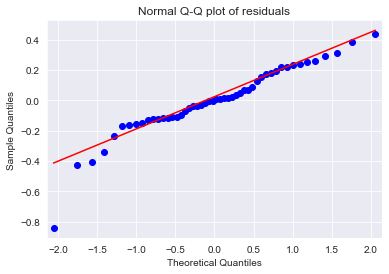

In [26]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [27]:
model.params

Intercept        -0.001237
RDS               0.917931
Administration   -0.018771
MS                0.081858
Florida           0.004982
NY               -0.001050
dtype: float64

In [31]:
model.pvalues,model.tvalues

(Intercept         9.830641e-01
 RDS               2.578772e-21
 Administration    6.077373e-01
 MS                1.226769e-01
 Florida           9.532429e-01
 NY                9.897941e-01
 dtype: float64,
 Intercept         -0.021349
 RDS               17.368580
 Administration    -0.517012
 MS                 1.573889
 Florida            0.058970
 NY                -0.012864
 dtype: float64)

In [32]:
#Standardized Model R squared value
model.rsquared

0.9507524843355148

In [34]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Wed, 19 May 2021   Prob (F-statistic):           1.34e-27
Time:                        23:08:22   Log-Likelihood:                 4.3255
No. Observations:                  50   AIC:                             3.349
Df Residuals:                      44   BIC:                             14.82
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.0012      0.058     -0.021      0.983      -0.118       0.116
RDS                0.9179      0.053     17.369      0.000       0.811       1.024
Administration    -0.0188      0.036     -0.517      0.608      -0.092       0.054
MS                 0.0819      0.052      1.574      0.123      -0.023       0.187
Florida            0.0050      0.084      0.059      0.953      -0.165       0.175
NY                -0.0010      0.082     -0.013      0.990      -0.166       0.163
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                         4.49
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Power transformation

In [35]:
renameddata1=cdata.rename(columns={"R&D Spend":"RDS","Marketing Spend":"MS","New York":"NY"})
renameddata1.head()

,RDS,Administration,MS,Profit,Florida,NY
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0


In [37]:
renameddata1.iloc[:,0:4]=PowerTransformer().fit_transform(renameddata1.iloc[:,0:4])
renameddata1.head()

,RDS,Administration,MS,Profit,Florida,NY
0,1.944774,0.520616,2.235260,1.981211,0,1
1,1.887542,1.136559,1.982668,1.969831,0,0
2,1.696725,-0.794485,1.659057,1.951861,1,0
3,1.507200,-0.186978,1.438192,1.754188,0,1
4,1.459790,-1.102756,1.287074,1.347196,1,0


In [38]:
model1=smf.ols('Profit~RDS+Administration+MS+Florida+NY',data=renameddata1).fit()

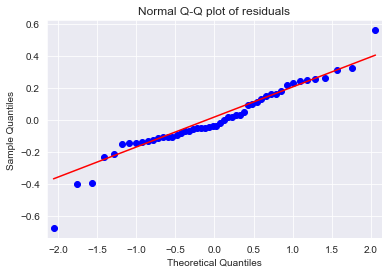

In [39]:
import statsmodels.api as sm
qqplot=sm.qqplot(model1.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [40]:
model1.params

Intercept        -0.005013
RDS               0.936702
Administration   -0.023764
MS                0.061889
Florida           0.006940
NY                0.008211
dtype: float64

In [41]:
#Rsquared values for Power transformed data
model1.rsquared

0.9579877546002599

In [42]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     200.7
Date:                Wed, 19 May 2021   Prob (F-statistic):           4.11e-29
Time:                        23:08:56   Log-Likelihood:                 8.2979
No. Observations:                  50   AIC:                            -4.596
Df Residuals:                      44   BIC:                             6.876
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.0050      0.054     -0.094      0.926      -0.113       0.103
RDS                0.9367      0.049     19.029      0.000       0.837       1.036
Administration    -0.0238      0.033     -0.711      0.481      -0.091       0.044
MS                 0.0619      0.049      1.272      0.210      -0.036       0.160
Florida            0.0069      0.078      0.089      0.929      -0.150       0.164
NY                 0.0082      0.075      0.109      0.914      -0.144       0.160
==============================================================================
Omnibus:                        5.537   Durbin-Watson:                   1.546
Prob(Omnibus):                  0.063   Jarque-Bera (JB):                6.153
Skew:                          -0.311   Prob(JB):                       0.0461
Kurtosis:                       4.602   Cond. No.                         4.48
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### QUANTILE TRANSFORMATION

In [43]:
renameddata2=cdata.rename(columns={"R&D Spend":"RDS","Marketing Spend":"MS","New York":"NY"})
renameddata2.head()

,RDS,Administration,MS,Profit,Florida,NY
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0


In [44]:
from sklearn.preprocessing import QuantileTransformer
qt = QuantileTransformer(random_state=0)
qtdf = qt.fit_transform(renameddata2)
qtdf = qt.transform(renameddata2)
df_qtdata = pd.DataFrame(data=qtdf, columns=['RDS','Administration','MS','Profit','Florida','NY'])
df_qtdata.head()

C:\Users\HP\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (50). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


,RDS,Administration,MS,Profit,Florida,NY
0,1.000000,0.693878,1.000000,1.000000,0.0,1.0
1,0.979592,0.836735,0.979592,0.979592,0.0,0.0
2,0.959184,0.224490,0.959184,0.959184,1.0,0.0
3,0.938776,0.448980,0.938776,0.938776,0.0,1.0
4,0.918367,0.122449,0.918367,0.918367,1.0,0.0


In [45]:
model2=smf.ols('Profit~RDS+Administration+MS+Florida+NY',data=df_qtdata).fit()

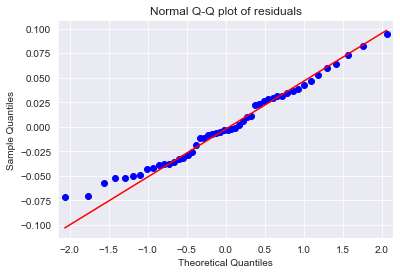

In [46]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
qqplot=sm.qqplot(model2.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

# Prediction


In [47]:
model2.predict(df_qtdata)

0     0.990379
1     0.981483
2     0.965330
3     0.932541
4     0.925919
5     0.875303
6     0.881170
7     0.855575
8     0.805528
9     0.845642
10    0.753425
11    0.740746
12    0.691484
13    0.675110
14    0.786364
15    0.764438
16    0.600491
17    0.702498
18    0.658582
19    0.601428
20    0.565251
21    0.603547
22    0.520000
23    0.484379
24    0.560935
25    0.407929
26    0.521677
27    0.492519
28    0.437518
29    0.409560
30    0.365864
31    0.329380
32    0.385047
33    0.337546
34    0.311161
35    0.289455
36    0.212587
37    0.283369
38    0.129980
39    0.261500
40    0.235968
41    0.196305
42    0.179014
43    0.093484
44    0.141193
45    0.053504
46    0.103772
47    0.004059
48    0.038991
49    0.011073
dtype: float64

In [48]:
renameddata3=cdata.rename(columns={"R&D Spend":"RDS","Marketing Spend":"MS","New York":"NY"})
renameddata3.head()

,RDS,Administration,MS,Profit,Florida,NY
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0


### LOGTRANSFORM

In [49]:
logdata=renameddata3[['RDS','Administration','MS','Profit']].apply(np.log)

In [50]:
logdata=pd.concat([logdata,state],axis=1)

In [51]:
logdata

,RDS,Administration,MS,Profit,Florida,New York
0,12.015815,11.826990,13.064277,12.166613,0,1
1,11.999034,11.927533,13.003351,12.164167,0,0
2,11.941075,11.524316,12.918862,12.160292,1,0
3,11.880151,11.684117,12.856311,12.116706,0,1
4,11.864338,11.422911,12.810849,12.020875,1,0
5,11.789624,11.511071,12.801776,11.963945,0,1
6,11.810178,11.899540,11.757571,11.958396,0,0
7,11.777580,11.888138,12.688118,11.956024,1,0
8,11.699758,11.909814,12.649518,11.933028,0,1
9,11.722659,11.596155,12.628007,11.916789,0,0


In [52]:
logdata=logdata.rename(columns={"New York":"NY"})

In [53]:
logdata=logdata.drop([logdata.index[47], logdata.index[48],logdata.index[49],logdata.index[19]])
logdata

,RDS,Administration,MS,Profit,Florida,NY
0,12.015815,11.826990,13.064277,12.166613,0,1
1,11.999034,11.927533,13.003351,12.164167,0,0
2,11.941075,11.524316,12.918862,12.160292,1,0
3,11.880151,11.684117,12.856311,12.116706,0,1
4,11.864338,11.422911,12.810849,12.020875,1,0
5,11.789624,11.511071,12.801776,11.963945,0,1
6,11.810178,11.899540,11.757571,11.958396,0,0
7,11.777580,11.888138,12.688118,11.956024,1,0
8,11.699758,11.909814,12.649518,11.933028,0,1
9,11.722659,11.596155,12.628007,11.916789,0,0


In [54]:
logdata

,RDS,Administration,MS,Profit,Florida,NY
0,12.015815,11.826990,13.064277,12.166613,0,1
1,11.999034,11.927533,13.003351,12.164167,0,0
2,11.941075,11.524316,12.918862,12.160292,1,0
3,11.880151,11.684117,12.856311,12.116706,0,1
4,11.864338,11.422911,12.810849,12.020875,1,0
5,11.789624,11.511071,12.801776,11.963945,0,1
6,11.810178,11.899540,11.757571,11.958396,0,0
7,11.777580,11.888138,12.688118,11.956024,1,0
8,11.699758,11.909814,12.649518,11.933028,0,1
9,11.722659,11.596155,12.628007,11.916789,0,0


In [55]:
#Building model on Logtransformed data
model3=smf.ols('Profit~RDS+Administration+MS+Florida+NY',data=logdata).fit()

In [56]:
    model3.rsquared

0.7454854853859432

In [60]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     23.43
Date:                Wed, 19 May 2021   Prob (F-statistic):           6.32e-11
Time:                        23:17:50   Log-Likelihood:                 19.770
No. Observations:                  46   AIC:                            -27.54
Df Residuals:                      40   BIC:                            -16.57
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          7.9282      1.338      5.925      0.000       5.224      10.632
RDS                0.2499      0.034      7.344      0.000       0.181       0.319
Administration     0.0598      0.109      0.548      0.587      -0.161       0.280
MS                 0.0179      0.039      0.463      0.646      -0.060       0.096
Florida            0.0425      0.062      0.683      0.499      -0.083       0.168
NY                 0.0681      0.062      1.100      0.278      -0.057       0.193
==============================================================================
Omnibus:                        9.500   Durbin-Watson:                   0.814
Prob(Omnibus):                  0.009   Jarque-Bera (JB):                8.743
Skew:                           0.986   Prob(JB):                       0.0126
Kurtosis:                       3.819   Cond. No.                     1.09e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### BUILDING MODEL BY USING SKLEARN LIBRARY

In [61]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

In [62]:
Scikitdata=pd.read_csv("C:/Users/HP/Downloads/multilinear regression/data set/50_Startups.csv")

In [63]:
cdata=Scikitdata.drop(['State'],axis=1)

In [64]:
state=pd.get_dummies(data['State'],drop_first=True)

### STANDARDIZATION

In [65]:
cdata.iloc[:,:]=StandardScaler().fit_transform(cdata.iloc[:,0:])

In [66]:
cdata
X=cdata.iloc[:,:-1]
y=cdata.iloc[:,-1]

In [67]:
cdata=pd.concat([cdata,state],axis=1)

In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0) 

In [69]:
regressor = LinearRegression()  
a=regressor.fit(x_train, y_train) 

print("Training complete.")

Training complete.


In [70]:
y_pred = regressor.predict(x_test)


In [73]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head()

,Actual,Predicted
28,-0.218798,-0.199448
11,0.808168,0.518951
10,0.854847,0.542031
41,-0.857466,-0.995408
2,1.980842,1.696019


In [74]:
from sklearn import metrics  
print('R_Squared score(test):',
        metrics.r2_score(y_test, y_pred))

R_Squared score(test): 0.9355188337118217


# Power Transformation

In [75]:
Powerdata=Scikitdata.drop(['State'],axis=1)

In [76]:
state=pd.get_dummies(data['State'],drop_first=True)

In [77]:
pt = PowerTransformer(method='yeo-johnson', standardize=True)
skl_yeojohnson = pt.fit(Powerdata)
calc_lambdas = skl_yeojohnson.lambdas_
skl_yeojohnson = pt.transform(Powerdata)
df_ptdata = pd.DataFrame(data=skl_yeojohnson, columns=['R&D Spend','Administration','Marketing Spend','Profit'])
df_ptdata
df_ptdata = pd.concat([df_ptdata,state],axis=1)
df_ptdata.head(5)

,R&D Spend,Administration,Marketing Spend,Profit,Florida,New York
0,1.562570,0.529102,1.580363,1.987125,0,1
1,1.527028,1.131285,1.451634,1.975666,0,0
2,1.406784,-0.790378,1.279964,1.957572,1,0
3,1.284497,-0.174305,1.157809,1.758577,0,1
4,1.253427,-1.106257,1.071572,1.349158,1,0


In [78]:
X=df_ptdata[['R&D Spend','Administration','Marketing Spend','Florida','New York']]
y=df_ptdata['Profit']

In [79]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0) 

In [80]:
model = LinearRegression()
model.fit(X_train,y_train)
#Prediction
y_pred = model.predict(X_test)

LR2 = r2_score(y_test,y_pred)

In [81]:
LR2

0.8466151526757889

,Var,Vif
0,R&D Spend,2.30
2,Marketing Spend,2.27
1,Administration,1.19
3,Florida,1.05
4,New York,1.02


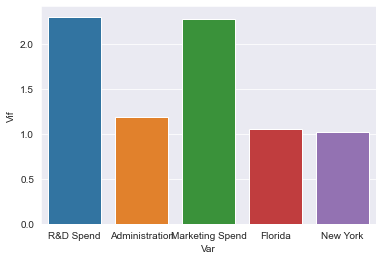

In [82]:
def calculate_vif(renameddata2):
    vif_df = pd.DataFrame(columns = ['Var', 'Vif'])
    x_var_names = renameddata2.columns
    for i in range(0, x_var_names.shape[0]):
        y = renameddata2[x_var_names[i]]
        x = renameddata2[x_var_names.drop([x_var_names[i]])]
        r_squared = sm.OLS(y,x).fit().rsquared
        vif = round(1/(1-r_squared),2)
        vif_df.loc[i] = [x_var_names[i], vif]
        sns.barplot(x="Var", y="Vif", data=vif_df)
    return vif_df.sort_values(by = 'Vif', axis = 0, ascending=False, inplace=False)

#X=df.drop(['Salary'],axis=1)
calculate_vif(X)

# Quantile Transformation

In [83]:
Qdata=Scikitdata.drop(['State'],axis=1)

In [84]:
from sklearn.preprocessing import QuantileTransformer

In [85]:
qt = QuantileTransformer(random_state=0)
qtdf = qt.fit_transform(Qdata)
qtdf = qt.transform(Qdata)
df_qtdata = pd.DataFrame(data=qtdf, columns=['R&D','Administration','MS','Profit'])
df_qtdata
df_qtdata = pd.concat([df_qtdata,state],axis=1)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (50). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


In [86]:
df_qtdata.head()

,R&D,Administration,MS,Profit,Florida,New York
0,1.000000,0.693878,1.000000,1.000000,0,1
1,0.979592,0.836735,0.979592,0.979592,0,0
2,0.959184,0.224490,0.959184,0.959184,1,0
3,0.938776,0.448980,0.938776,0.938776,0,1
4,0.918367,0.122449,0.918367,0.918367,1,0


In [87]:
X=df_qtdata[['R&D','Administration','MS','Florida','New York']]
y=df_qtdata['Profit']

In [88]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0) 

In [89]:
model = LinearRegression()
model.fit(X_train,y_train)
#Prediction
y_pred = model.predict(X_test)

LR2 = r2_score(y_test,y_pred)

In [90]:
LR2

0.9697482460452593

OBSERVATION:
    
By Using OLS method and applying Quantile Transformation, the r_squared accuracy of about 98% is obtained which is the best prediction